In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
# SVC is the classifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                  header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
# we need to rename the columns, this is a heart dataset
data.columns = ['age','sex','cp','restbp','chol','fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
data.describe(include='all')

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [11]:
data['ca'].unique()
# it is dt object because it has ?

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [13]:
# check out how many ? we have 
data[data['ca']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [14]:
data[data['thal']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [16]:
# small amount so we can delete them

index_to_drop = []
index_to_drop = list(data[data['ca']=='?'].index.values) + list(data[data['thal']=='?'].index.values)

In [17]:
# delete them
data.drop(index_to_drop, axis=0, inplace=True)

In [19]:
# now convert what remains of them to a numeric dtype
data['ca'] = pd.to_numeric(data['ca'])
data['thal'] = pd.to_numeric(data['thal'])

In [20]:
# verify
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


<Axes: xlabel='hd', ylabel='thal'>

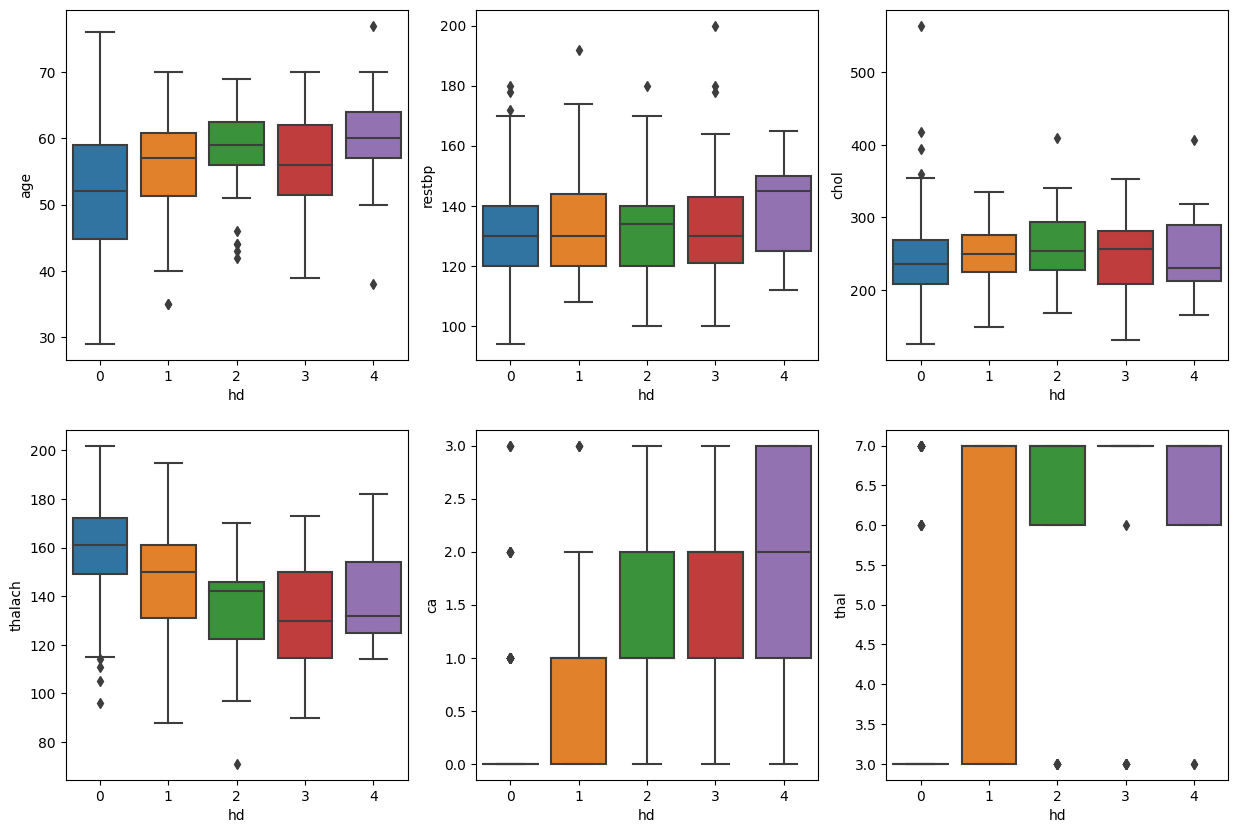

In [29]:
# data exploration

# create lots of box plots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,10))

sns.boxplot(x='hd', y = 'age', data=data, ax=ax1)
sns.boxplot(x='hd', y = 'restbp', data=data, ax=ax2)
sns.boxplot(x='hd', y = 'chol', data=data, ax=ax3)
sns.boxplot(x='hd', y = 'thalach', data=data, ax=ax4)
sns.boxplot(x='hd', y = 'ca', data=data, ax=ax5)
sns.boxplot(x='hd', y = 'thal', data=data, ax=ax6)

<Axes: xlabel='hd', ylabel='thalach'>

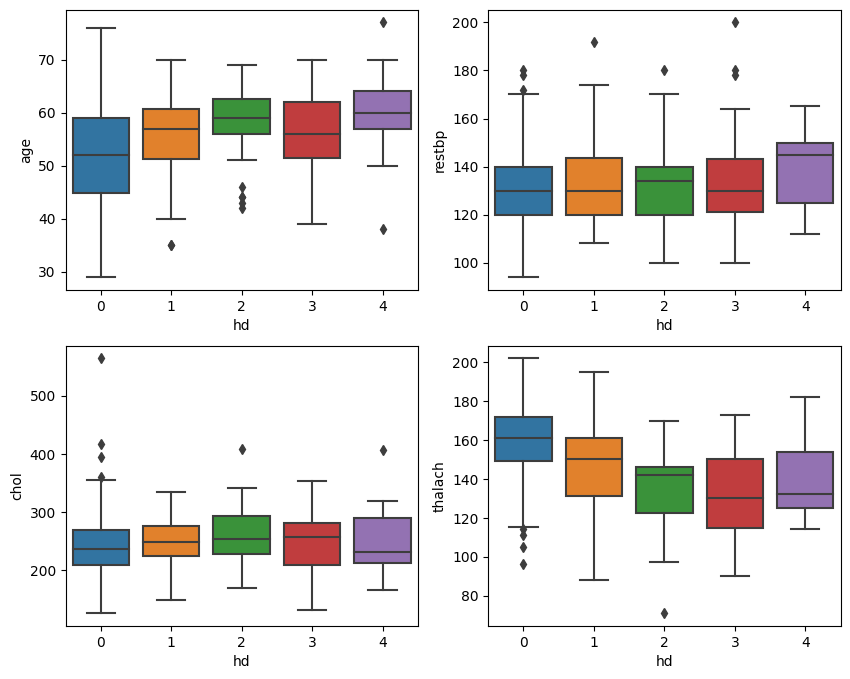

In [31]:
# age seems to be higher for disease 4, perhaps affects older people more

# data dictionary
# https://search.r-project.org/CRAN/refmans/MixAll/html/HeartDisease.html#:~:text=Description,status%20is%20in%20the%20HeartDisease.

# accidentally plotted two categorical variables
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd',y='age', data=data, ax=ax1)
sns.boxplot(x='hd',y='restbp', data=data, ax=ax2)
sns.boxplot(x='hd',y='chol', data=data, ax=ax3)
sns.boxplot(x='hd',y='thalach', data=data, ax=ax4)

In [32]:
# check categorical variables

data.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
hd,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


In [33]:
# map 1-4 to type = 1
# consolidating to show us how model changes with poorly balanced data
# initial data has poor balance among the diseases, so we group them as no disease vs disease to get better balance

mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
data['hd_cons'] = data['hd'].map(mapping)

In [35]:
data.groupby('hd_cons').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
hd_cons,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137


<Axes: xlabel='hd_cons', ylabel='thalach'>

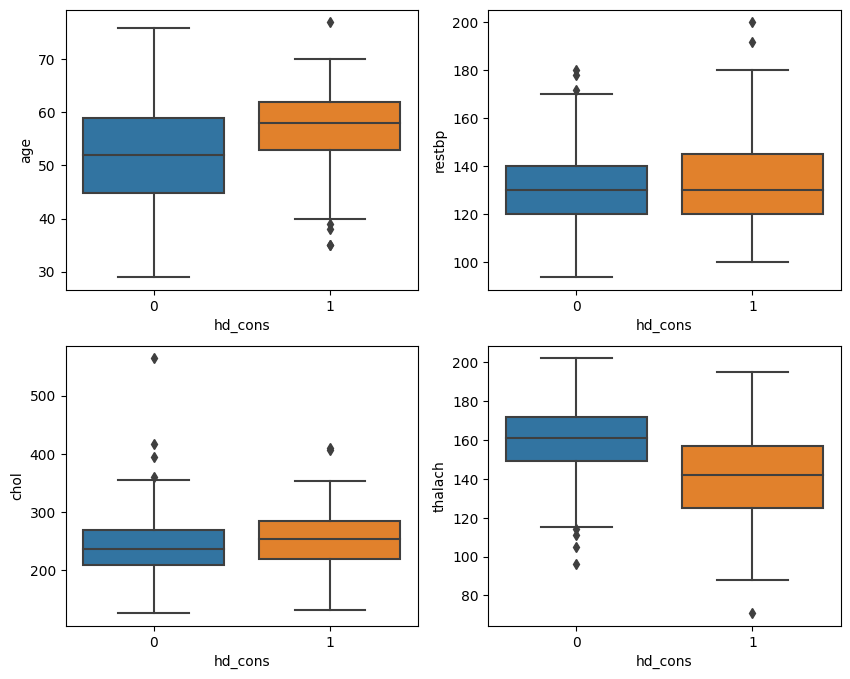

In [36]:
# retry plots now with consolidated data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd_cons',y='age', data=data, ax=ax1)
sns.boxplot(x='hd_cons',y='restbp', data=data, ax=ax2)
sns.boxplot(x='hd_cons',y='chol', data=data, ax=ax3)
sns.boxplot(x='hd_cons',y='thalach', data=data, ax=ax4)

In [37]:
data.groupby(['hd', 'sex']).count().unstack()

# looks like we have more men than women in every category

age      cp     restbp     chol     fbs      ... oldpeak     slope       
sex 0.0 1.0 0.0 1.0    0.0 1.0  0.0 1.0 0.0 1.0  ...     0.0 1.0   0.0 1.0   
hd                                               ...                         
0    71  89  71  89     71  89   71  89  71  89  ...      71  89    71  89  \
1     9  45   9  45      9  45    9  45   9  45  ...       9  45     9  45   
2     7  28   7  28      7  28    7  28   7  28  ...       7  28     7  28   
3     7  28   7  28      7  28    7  28   7  28  ...       7  28     7  28   
4     2  11   2  11      2  11    2  11   2  11  ...       2  11     2  11   

     ca     thal     hd_cons      
sex 0.0 1.0  0.0 1.0     0.0 1.0  
hd                                
0    71  89   71  89      71  89  
1     9  45    9  45       9  45  
2     7  28    7  28       7  28  
3     7  28    7  28       7  28  
4     2  11    2  11       2  11  

[5 rows x 26 columns]

In [39]:
# cother columns

data.groupby(['hd', 'cp'])['thal'].count().unstack()


cp,1.0,2.0,3.0,4.0
hd,,,,
0,16.0,40.0,65.0,39.0
1,5.0,6.0,9.0,34.0
2,1.0,1.0,4.0,29.0
3,NaN,2.0,4.0,29.0
4,1.0,NaN,1.0,11.0


In [40]:
# most ppl didnt have high blood sugar, may not be a great predictor variable
data.groupby(['hd', 'fbs'])['thal'].count().unstack()


fbs,0.0,1.0
hd,,
0,137,23
1,51,3
2,27,8
3,27,8
4,12,1


In [41]:
data.groupby(['hd', 'restecg'])['thal'].count().unstack()
# bigger proportion of ppl with sever disease had 2 (probably hypertrophy)

restecg,0.0,1.0,2.0
hd,,,
0,92.0,1.0,67.0
1,23.0,NaN,31.0
2,18.0,1.0,16.0
3,12.0,1.0,22.0
4,2.0,1.0,10.0


In [42]:
data.groupby(['hd', 'exang'])['thal'].count().unstack()
# bigger portion of ppl with disease had this condition, could be a good predictor variable


exang,0.0,1.0
hd,,
0,137,23
1,30,24
2,14,21
3,12,23
4,7,6


In [43]:
# slope is the next one
data.groupby(['hd', 'slope'])['thal'].count().unstack()
# 


slope,1.0,2.0,3.0
hd,,,
0,103,48,9
1,22,30,2
2,7,25,3
3,6,24,5
4,1,10,2


In [44]:
data.groupby(['hd', 'ca'])['thal'].count().unstack()


ca,0.0,1.0,2.0,3.0
hd,,,,
0,129,21,7,3
1,26,19,6,3
2,8,14,9,4
3,8,8,14,5
4,3,3,2,5


In [45]:
data.groupby(['hd', 'thal'])['thal'].count().unstack()


thal,3.0,6.0,7.0
hd,,,
0,127,6,27
1,22,3,29
2,7,6,22
3,6,1,28
4,2,2,9


<Axes: xlabel='hd'>

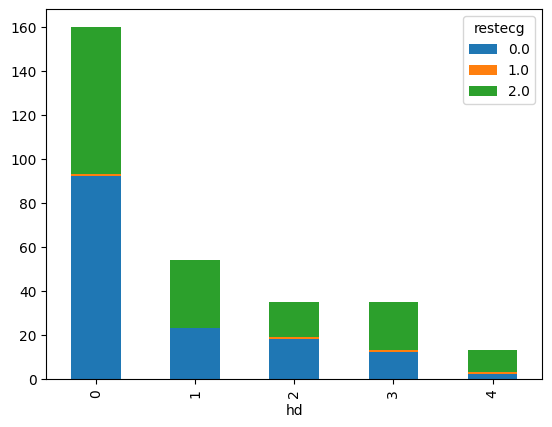

In [47]:
# make a plot iwth unstack
data.groupby(['hd', 'restecg'])['thal'].count().unstack().plot(kind='bar', stacked=True)


In [48]:
# make dummy variables for categorical variables

cat_cilmns = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal', 'exang', 'fbs']

In [52]:
# split the data
x = data.iloc[:,:13]
# select y has the hd col
y = data.iloc[:,13]
# grab the consolidated col (binary)
yv2 = data.iloc[:,14]

In [54]:
x_encoded = pd.get_dummies(x, columns=cat_cilmns, dtype=int)
x_encoded

,age,restbp,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [55]:
# split the  data
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, random_state=123)

In [58]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(x_train, y_train)

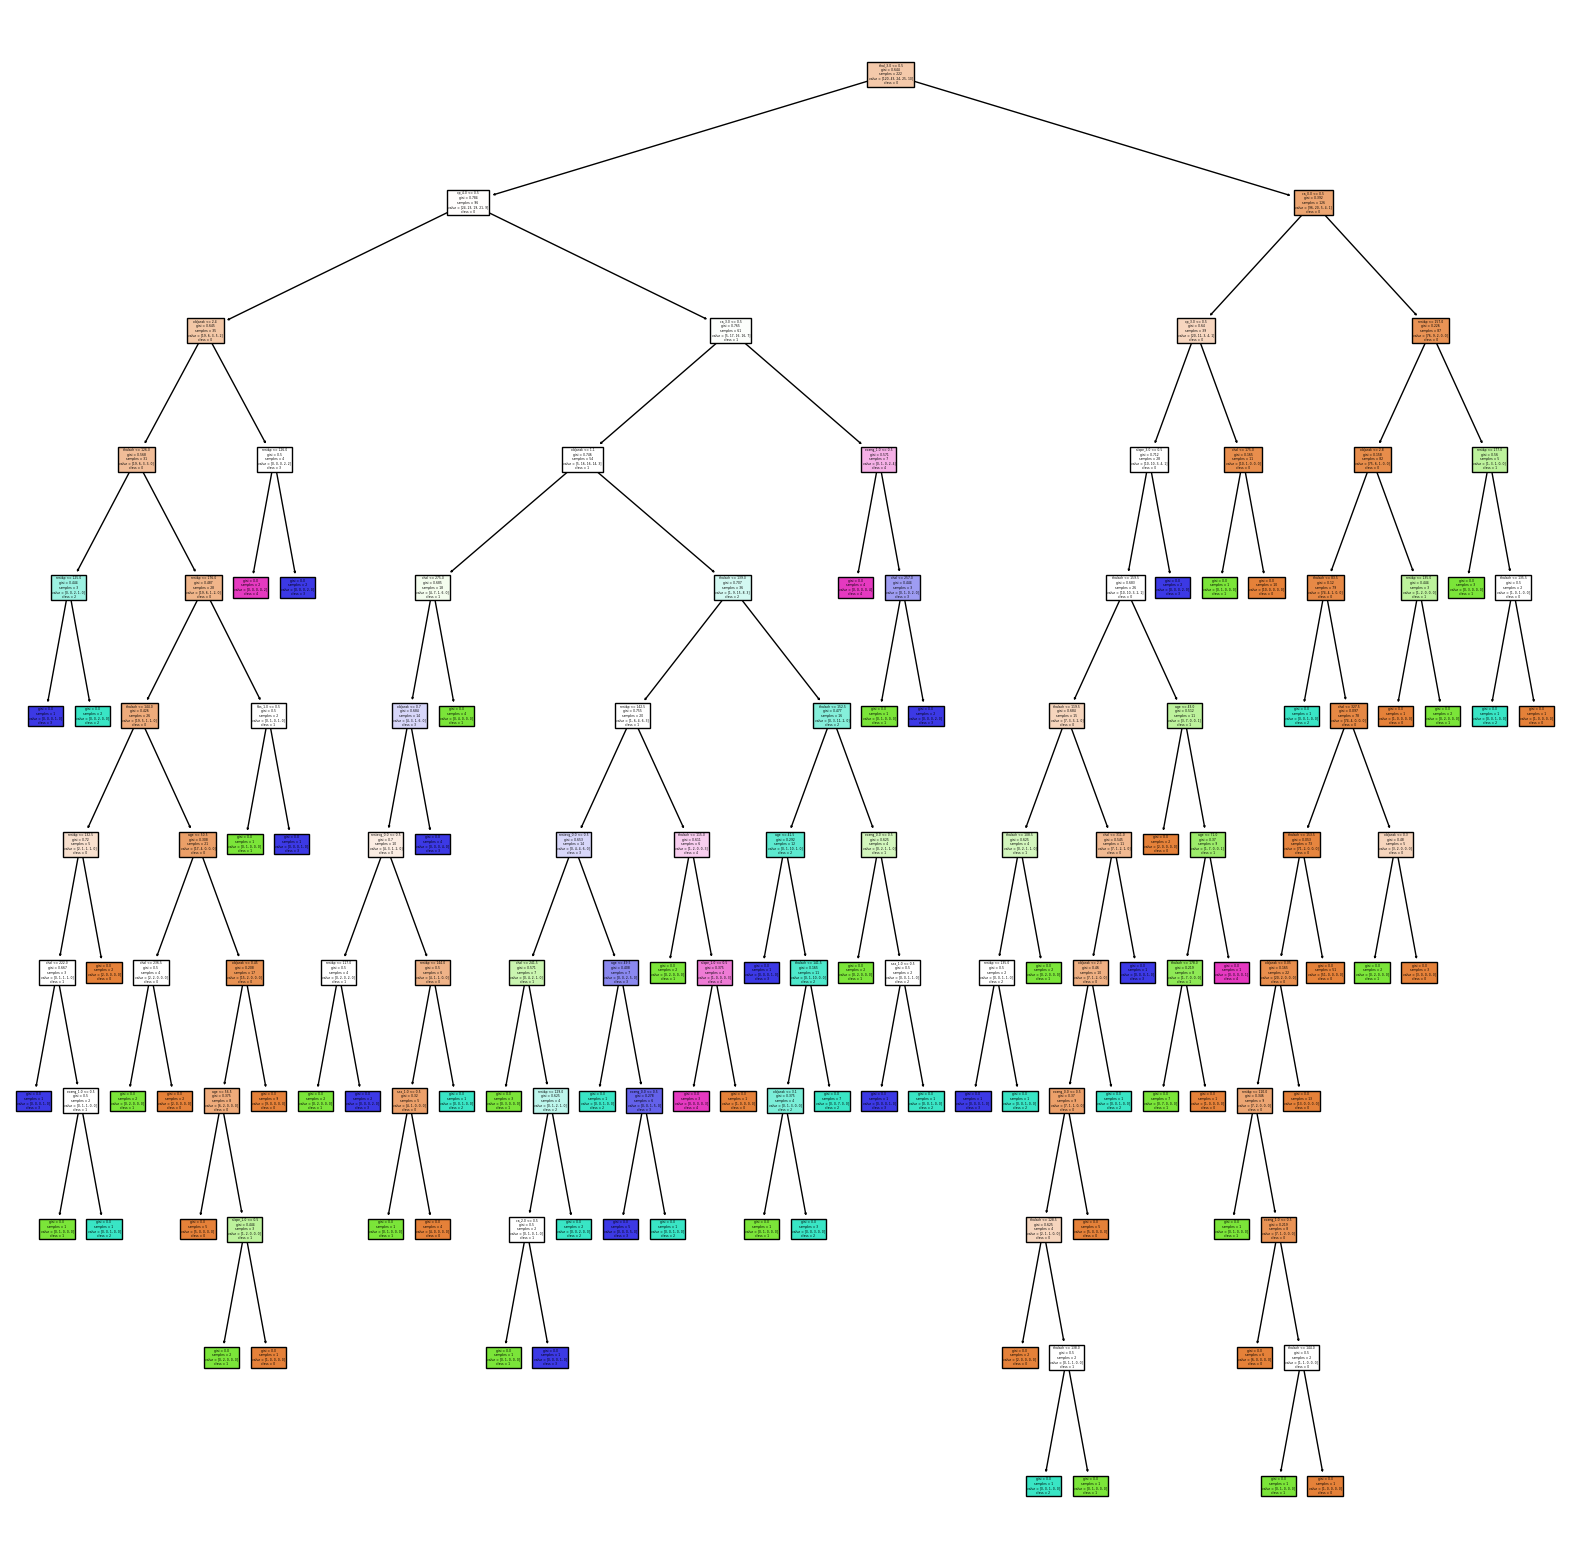

In [62]:
plt.figure(figsize=(20,20))
test = plot_tree(dt, filled=True, class_names=['0','1','2','3','4'], feature_names=x_encoded.columns)
plt.savefig('tree',dpi=800)

[Text(0.5456730769230769, 0.9583333333333334, 'thal_3.0 <= 0.5\ngini = 0.497\nsamples = 222\nvalue = [120, 102]\nclass = no_hd'),
 Text(0.2860576923076923, 0.875, 'cp_4.0 <= 0.5\ngini = 0.375\nsamples = 96\nvalue = [24, 72]\nclass = hd'),
 Text(0.16826923076923078, 0.7916666666666666, 'ca_0.0 <= 0.5\ngini = 0.496\nsamples = 35\nvalue = [19, 16]\nclass = no_hd'),
 Text(0.07692307692307693, 0.7083333333333334, 'slope_1.0 <= 0.5\ngini = 0.391\nsamples = 15\nvalue = [4, 11]\nclass = hd'),
 Text(0.038461538461538464, 0.625, 'ca_3.0 <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]\nclass = hd'),
 Text(0.019230769230769232, 0.5416666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = hd'),
 Text(0.057692307692307696, 0.5416666666666666, 'thalach <= 142.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = hd'),
 Text(0.038461538461538464, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = hd'),
 Text(0.07692307692307693, 0.4583333333333333, 'gini = 0.0\nsamples = 

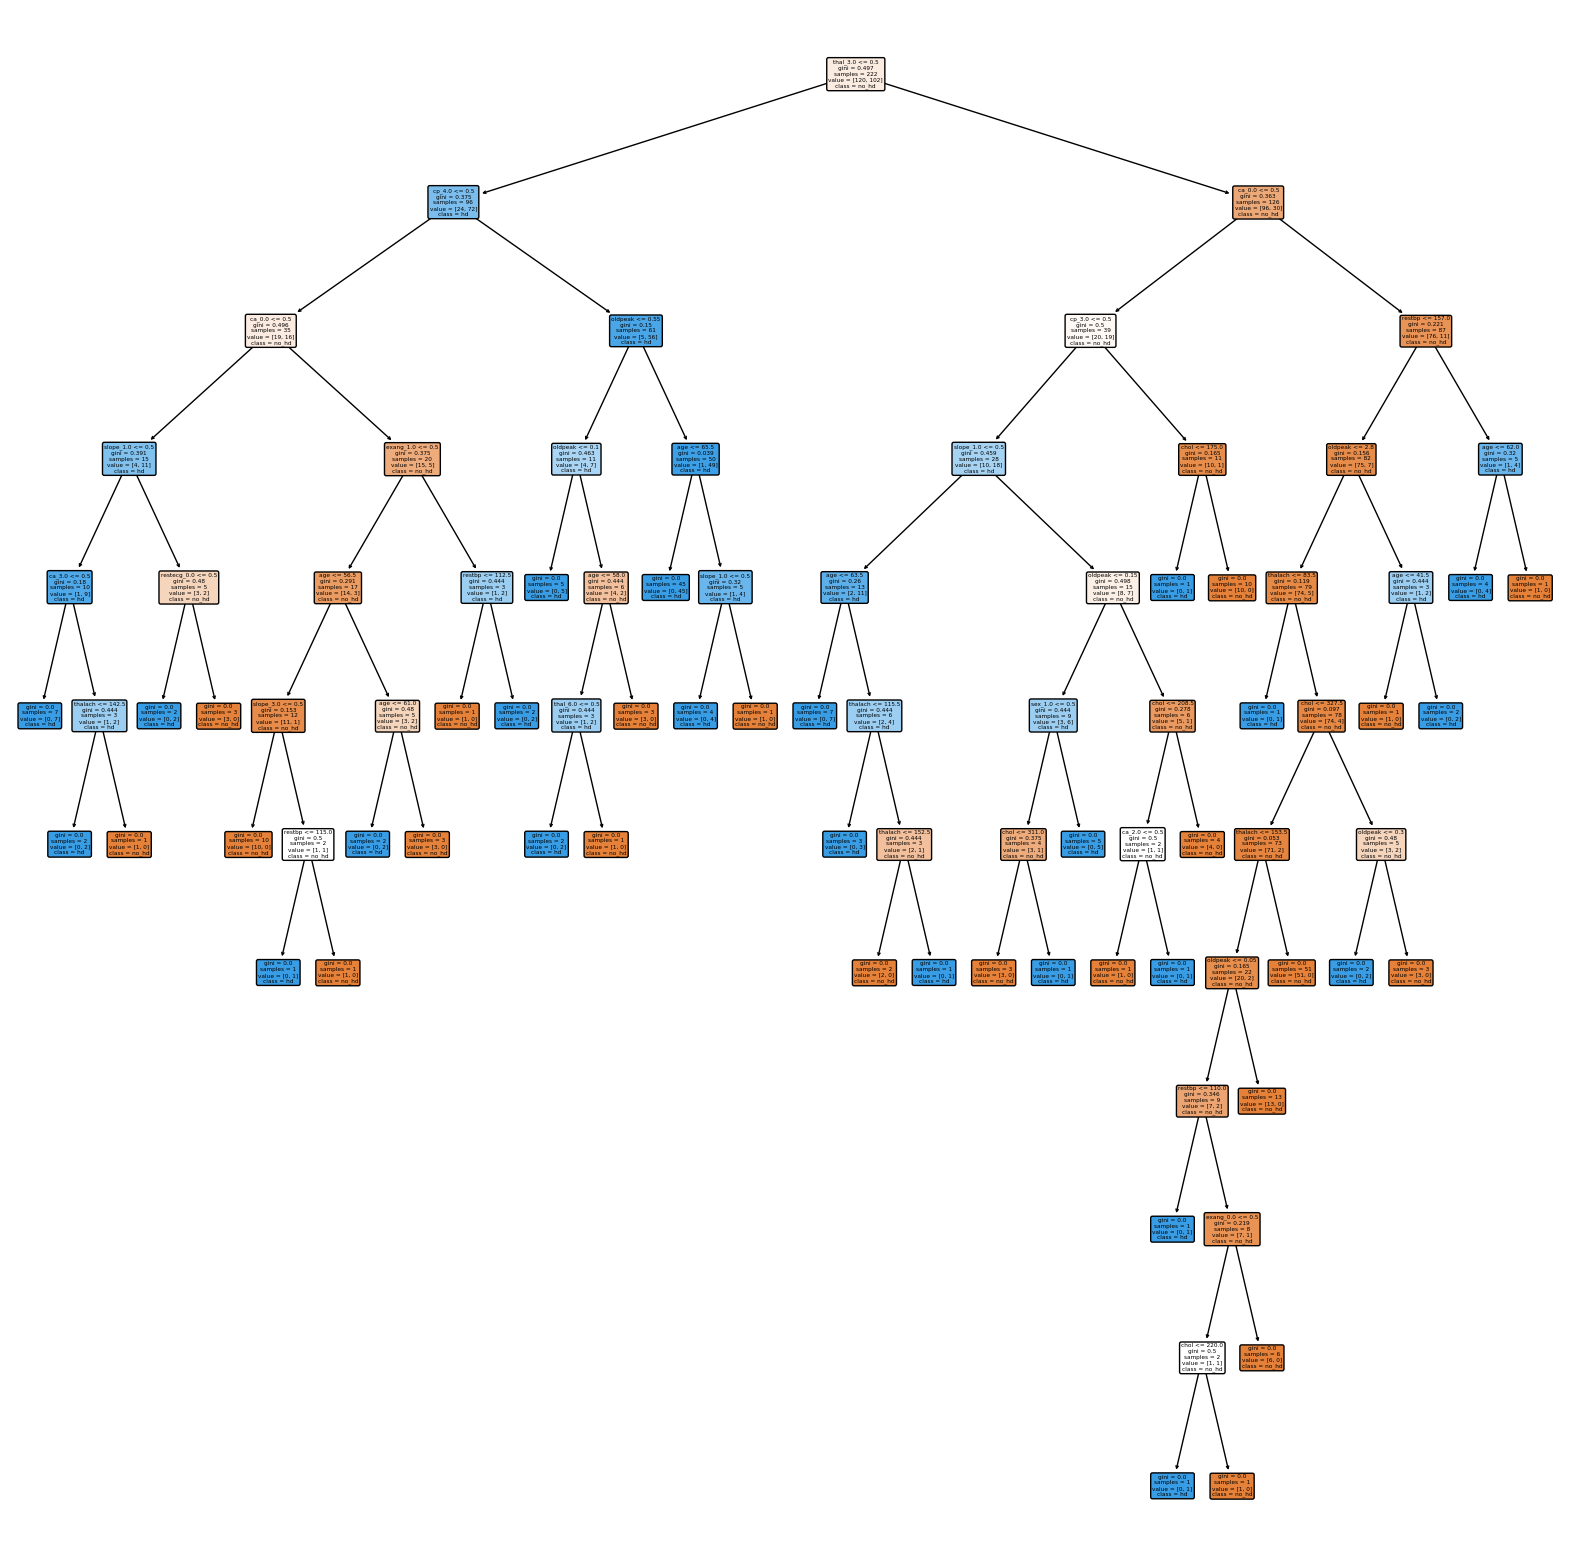

In [72]:
# now train model for the consolidated output
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_encoded, yv2, random_state=123)
dt_v2 = DecisionTreeClassifier(random_state=123)
dt_v2 = dt_v2.fit(x_train2, y_train2)
plt.figure(figsize=(20,20))
plot_tree(dt_v2, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=x_encoded.columns)

In [65]:
# for original data
predicted = dt.predict(x_test)
predicted

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [66]:
predictv2 = dt_v2.predict(x_test2)

In [67]:
print('v1_model: ', accuracy_score(predicted, y_test))
# low accuracy, it was overfitted to the training data
print('v2_model: ', accuracy_score(predictv2, y_test2))
# better than above, overfitted from plot, can see that it is perfectly fitted to second scenario

v1_model:  0.49333333333333335
v2_model:  0.7733333333333333


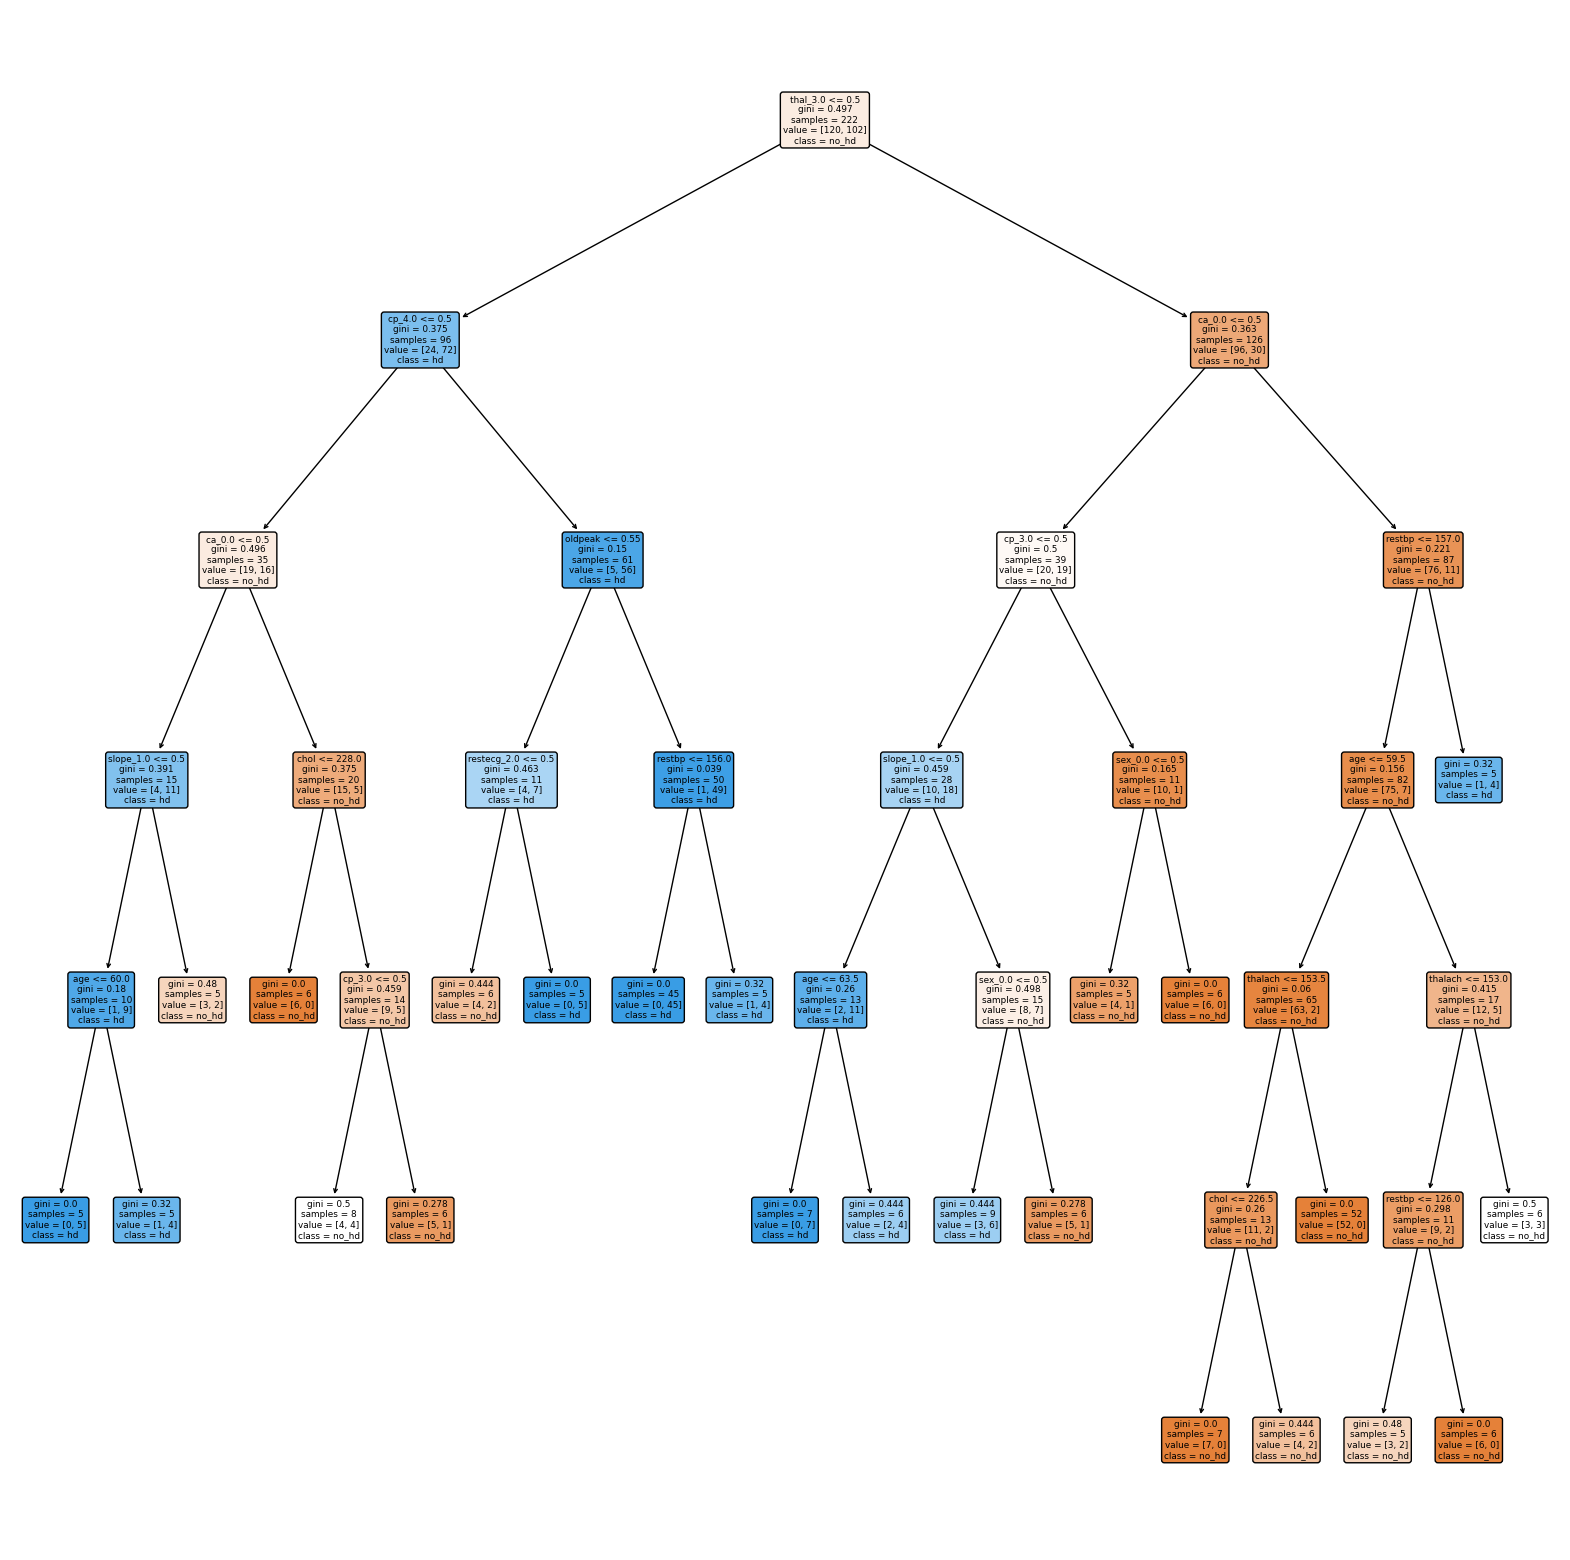

In [73]:
# hyper param tuning, try to improve overfitting
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_encoded, yv2, random_state=123)
dt_v3 = DecisionTreeClassifier(random_state=123, max_depth=6, min_samples_leaf=5)
dt_v3 = dt_v3.fit(x_train3, y_train3)
plt.figure(figsize=(20,20))
plot = plot_tree(dt_v3, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=x_encoded.columns)

In [74]:
pred3 = dt_v3.predict(x_test3)
print(accuracy_score(pred3, y_test3))

0.8266666666666667


In [75]:
# compare to knn

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train3, y_train3)
predKnn = knn.predict(x_test3)
print(accuracy_score(predKnn, y_test3))
# decision tree more accurante bc it is more flexible when making predictions

0.6266666666666667
